# Занятие 9 
# Прикладная алгебра и численные методы
## Матричные нормы. 

In [ ]:
import numpy as np
import sympy
import scipy.linalg
import numpy.linalg
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

## Подчиненные (операторные) матричные нормы.

https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html

numpy.linalg.norm(x, ord=None, axis=None, keepdims=False)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.norm.html

scipy.linalg.norm(a, ord=None, axis=None, keepdims=False, check_finite=True)

если check_finite=True, проверяется, все ли элементы матрицы конечны  


#### Возможные значения параметра ord 
одинаково в numpy и scipy
$$
\begin{matrix}
ord &	norm\ for\ matrices\\
None &		Frobenius\ norm\\
‘fro’	 &	Frobenius\ norm\\
‘nuc’ &		nuclear\ norm\\
inf &		max(sum(abs(x),\ axis=1))\\
-inf &		min(sum(abs(x),\ axis=1))\\
0	 &	–\\
1	 &	max(sum(abs(x),\ axis=0))\\
-1 &		min(sum(abs(x),\ axis=0))\\
2	 &	2-norm\ (largest\ singular\ value)\\
-2 &		smallest\ singular\ value\\
other &		–
\end{matrix}
$$


Матричная норма 
$ \|A\|_{1}=\max \limits _{1\leq j\leq n}\sum _{i=1}^{m}|a_{ij}|$, подчинённая векторной норме$ \|x\|_{1}=\sum _{i=1}^{n}|x_{i}|$.

Матричная норма $\|A\|_{\infty }=\max \limits _{1\leq i\leq m}\sum _{j=1}^{n}|a_{ij}|$, подчинённая векторной норме $\|x\|_{\infty }=\max \limits _{1\leq i\leq n}|x_{i}|$.

Спектральная норма $\|A\|_{2}=\sup \limits _{\|x\|_{2}=1}\|Ax\|_{2}=\sup \limits _{(x,x)=1}{\sqrt {(Ax,Ax)}}={\sqrt {\lambda _{max}(A^{*}A)}}$, подчиненная векторной норме $\|x\|_{2}={\sqrt {\sum _{i=1}^{n}|x_{i}|^{2}}}$.

Норма Фробениуса $ \|A\|_{F} = \sqrt{\sum _{i, j}|a_{ij}|^2} = {\rm tr}(A^*A) = \sqrt{\sum _{i=1}^{n}\sigma_{i}^2}$

Ядерная норма  $ \|A\|_{nuc} = \sum _{i=1}^{n}\sigma_{i}$

https://docs.sympy.org/latest/modules/matrices/matrices.html#sympy.matrices.matrices.MatrixBase.norm

В sympy реализованы нормы с такими же значениями ord, как в scipy и numpy:

norm(ord=None)

это метод в классе матриц.

## Задание 1.
Вычислить матричные нормы $||M||_1$, $||M||_2$, $||M||_\infty$ и $||M||_F$  для матрицы из файла sem10task1.xlsx. 

Использовать scipy, numpy для всех норм, sympy для $||M||_1$ и $||M||_\infty$.


In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving sem9task1.xlsx to sem9task1 (1).xlsx
User uploaded file "sem9task1.xlsx" with length 16075 bytes


In [ ]:
def calcNorms(A, norms, package = "sympy"):
  if (package == "sympy"):
    A = sympy.Matrix(A)
    res = [f'||A||{item} = {round(A.norm(ord=item), 3)}' for item in norms]
  elif (package == "numpy"):
    res = [f'||A||{item} = {round(np.linalg.norm(A, ord=item), 3)}' for item in norms]
  elif (package == "scipy"):
    res = [f'||A||{item} = {round(scipy.linalg.norm(A, ord=item), 3)}' for item in norms]

  return res

In [ ]:
A = pd.read_excel(fn, index_col=None, header=None).values 

res = calcNorms(A, (1, 2, np.inf, 'fro'), "numpy")
print('numpy: ',res)

res = calcNorms(A, (1, 2, np.inf, 'fro'), "scipy")
print('scipy: ', res)

res = calcNorms(A, (1, sympy.oo))
print('sympy: ', res)

numpy:  ['||A||1 = 91.0', '||A||2 = 38.77', '||A||inf = 99.0', '||A||fro = 87.057']
scipy:  ['||A||1 = 91.0', '||A||2 = 38.77', '||A||inf = 99.0', '||A||fro = 87.057']
sympy:  ['||A||1 = 91', '||A||oo = 99']


## Спектр матрицы - множество ее собственных значений.
https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigvals.html

numpy.linalg.eigvals(a)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigvals.html

scipy.linalg.eigvals(a, b=None, overwrite_a=False, check_finite=True, homogeneous_eigvals=False)
## Задание 2
Пусть $A_2$ - матрица, состоящая из первых десяти строк и первых десяти столбцов матрицы Задания 1.
С помощью разложения SVD (scipy.linalg.svdvals) получить сингулярные числа матрицы $A_2$. Изобразить на комплексной плоскости сингулярные числа, спектр матрицы $A_2$ и окружность с радиусом, равным спектральному радиусу матрицы $A_2$.

Вывести на экран спектр, спектральный радиус и сингулярные числа.


In [ ]:
A2 = pd.read_excel(fn, index_col=None, header=None).values 
A2 = A2[:10, :10]

A2_svdvals = scipy.linalg.svdvals(A2)
A2_spectr = numpy.linalg.eigvals(A2)

print("svdvals:", *[(round(item.real, 3), round(item.imag, 3)) for item in A2_svdvals], sep='\n')
print("eigvals:", *[(round(item.real, 3), round(item.imag, 3)) for item in A2_spectr], sep='\n')

svdvals:
(31.306, 0.0)
(25.257, 0.0)
(23.787, 0.0)
(21.113, 0.0)
(19.879, 0.0)
(17.304, 0.0)
(12.815, 0.0)
(7.788, 0.0)
(5.992, 0.0)
(1.75, 0.0)
eigvals:
(-13.36, 10.768)
(-13.36, -10.768)
(-7.557, 9.391)
(-7.557, -9.391)
(-10.753, 0.0)
(13.537, 11.046)
(13.537, -11.046)
(13.577, 2.386)
(13.577, -2.386)
(5.358, 0.0)


In [ ]:
radiusA2 = abs(A2_spectr).max()
print("radius: ", radiusA2)

radius:  17.47135465227096


Сингулярные числа [31.3, 25.3, 23.8, 21.1, 19.9, 17.3, 12.8, 7.8, 6.0, 1.8]


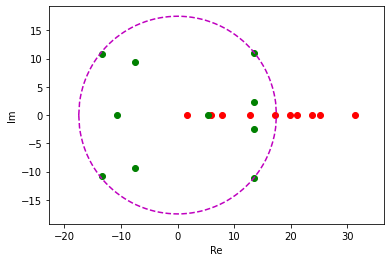

In [ ]:
ax = plt.gca()  
radius2 = radiusA2 ** 2
X = np.linspace(-radiusA2, radiusA2, 256)
Y = np.sqrt(radius2 - X ** 2)
ax.axis('equal')
ax.plot(A2_svdvals, np.zeros(len(A2_svdvals)), 'ro', np.real(A2_spectr), np.imag(A2_spectr), 'go', X, Y, 'm--', X, -Y, 'm--')
ax.set_xlabel('Re')
ax.set_ylabel('Im')
print(f'Сингулярные числа {[round(item, 1) for item in A2_svdvals]}')

## Задание 3
Пусть $A_3$ - матрица, составленная из четных строк и нечетных столбцов матрицы $A_1$ (считаем, что нумерация с единицы!). 

Проверить утверждение $||A||_F = \sqrt{\sigma_1^2 + \sigma_1^2 + ... + \sigma_1^n}$ на матрицах $A_1$, $A_2$ и $A_3$. 

Использовать цикл, не копировать код!


In [ ]:
    A3 = A[1::2, ::2]
    
    print('A1: ', np.allclose(np.linalg.norm(A, ord='fro'), np.sqrt(sum([i**2 for i in scipy.linalg.svdvals(A)]))))
    print('A2: ', np.allclose(np.linalg.norm(A2, ord='fro'), np.sqrt(sum([i**2 for i in scipy.linalg.svdvals(A2)]))))
    print('A3: ', np.allclose(np.linalg.norm(A3, ord='fro'), np.sqrt(sum([i**2 for i in scipy.linalg.svdvals(A3)]))))


A1:  True
A2:  True
A3:  True


## Повторение и подготовка к контрольной.
## Задание 4
Найти псевдообратную матрицу к матрице $A_{5\times 8}$ из файла A58.xlsx 

с помощью pinv из numpy и scipy

## Задание 5 линейная регрессия
Считать данные из файла .xlsx.

Найти коэффициенты $k$ и $b$ линейной регрессии $Q = a_1t+a_2u+a_3v$, если $t$, $u$, $v$ - второй, третий и четвертый столбцы, $Q$ - первый столбец.